In [1]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()
df.duplicated().sum()#find duplicate 
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
print(df["Exited"].value_counts())
print(df["Gender"].value_counts())
print(df["Geography"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [6]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [7]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=2,random_state=1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

X_train_scaled,X_test_scaled

(array([[-1.23676019,  0.29353011, -1.04191108, ..., -0.57881318,
         -0.57388544, -1.09578666],
        [ 0.61523625, -0.46925336,  1.03271175, ...,  1.72767315,
         -0.57388544,  0.9125864 ],
        [-1.11260401, -0.85064509,  0.3411708 , ...,  1.72767315,
         -0.57388544,  0.9125864 ],
        ...,
        [ 0.22207499,  0.57957391,  1.37848222, ..., -0.57881318,
         -0.57388544, -1.09578666],
        [ 0.12895785,  0.00748631,  1.03271175, ..., -0.57881318,
         -0.57388544, -1.09578666],
        [ 1.16359273,  0.29353011,  0.3411708 , ...,  1.72767315,
         -0.57388544,  0.9125864 ]]),
 array([[-1.,  1., -1., -1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 1., -1.,  1.,  1., -1.,  0., -1., -1.,  0.,  0.,  0.]]))

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model=Sequential()
#input dimention=11
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.fit(X_train_scaled,y_train,epochs=20)


Epoch 1/20

313/313 [==============================] - 3s 2ms/step - loss: 0.5364
Epoch 2/20
313/313 [==============================] - 0s 2ms/step - loss: 0.4779
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4518
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4383
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4312
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4270
Epoch 7/20
313/313 [==============================] - 0s 2ms/step - loss: 0.4242
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4222
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4204
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4188
Epoch 11/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4174
Epoch 12/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4161
Epoch 13/20
313/313 [==

In [12]:
model.layers[0].get_weights()
model.layers[1].get_weights()

[array([[ 1.1199138],
        [-1.8049767],
        [-1.655806 ]], dtype=float32),
 array([-0.21143462], dtype=float32)]

In [13]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 93ms/step


array([[0.29033172],
       [0.10202656]], dtype=float32)

In [14]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100

250/250 [==============================] - 2s 3ms/step - loss: 0.4102 - accuracy: 0.8318 - val_loss: 0.4049 - val_accuracy: 0.8270
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4097 - accuracy: 0.8327 - val_loss: 0.4049 - val_accuracy: 0.8295
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8335 - val_loss: 0.4049 - val_accuracy: 0.8295
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8345 - val_loss: 0.4046 - val_accuracy: 0.8305
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8338 - val_loss: 0.4045 - val_accuracy: 0.8305
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8342 - val_loss: 0.4044 - val_accuracy: 0.8305
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8341 - val_loss: 0.4043 - val_accuracy: 0.830

In [15]:
import matplotlib.pyplot as plt
history.history

{'loss': [0.4102025330066681,
  0.40972015261650085,
  0.4093679189682007,
  0.4090093970298767,
  0.4087745249271393,
  0.40845853090286255,
  0.40820205211639404,
  0.40798690915107727,
  0.4077656865119934,
  0.4074631333351135,
  0.40727755427360535,
  0.40708816051483154,
  0.40692272782325745,
  0.40674692392349243,
  0.4066186547279358,
  0.4064652621746063,
  0.40622931718826294,
  0.4060835540294647,
  0.40596044063568115,
  0.4058721661567688,
  0.40572160482406616,
  0.40559718012809753,
  0.4055403470993042,
  0.4053645730018616,
  0.40526512265205383,
  0.4051443636417389,
  0.4050506055355072,
  0.4049655795097351,
  0.40483358502388,
  0.4047588109970093,
  0.4046792685985565,
  0.40456855297088623,
  0.40449059009552,
  0.40438058972358704,
  0.40423986315727234,
  0.4041901230812073,
  0.40413522720336914,
  0.4041071832180023,
  0.40394511818885803,
  0.4038732647895813,
  0.40382450819015503,
  0.4036526381969452,
  0.4035983681678772,
  0.4035490155220032,
  0.40346

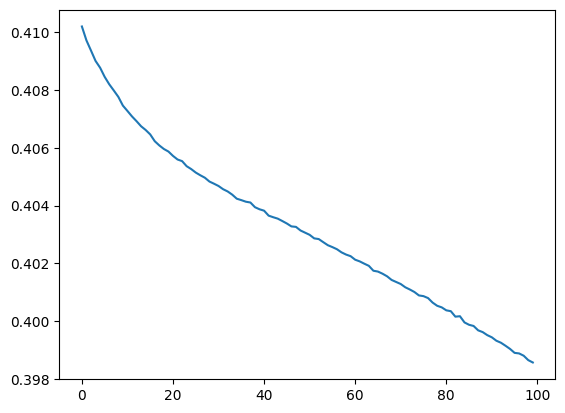

In [17]:
plt.plot(history.history['loss'])